<a href="https://colab.research.google.com/github/Melsonwang1/CVNL-assignment/blob/main/RNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!cd /content/drive/My\ Drive/Colab\ Notebooks/
!ls
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')
from idlmam  import *

Mounted at /content/drive
drive  sample_data


/content/drive/My Drive/Colab Notebooks/idlmam.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
import unicodedata
import string
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim

print("importing the relevant modules")

importing the relevant modules


In [5]:
!pip install datasets
print("download dataset to import it later on")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 w

In [6]:

from datasets import load_dataset

# Load the GoEmotions dataset
dataset = load_dataset("go_emotions")

# Check the dataset structure
print(dataset)
label_mapping = dataset["train"].features["labels"].feature.names
print(label_mapping)  # List of all emotion labels


print("importing the go_emotions dataset and printint the dataset out to check format of dataset")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.40k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.77M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/350k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/347k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})
['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']
importing the go_emotions dataset and printint the dataset out to check format of dataset


In [8]:
emotion_data = {}


all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)
alphabet = {}
for i in range(n_letters):
  alphabet[all_letters[i]] = i


def unicodeToAscii(s):
    # Turns a Unicode string into plain ASCII
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn' and c in all_letters
    )

print()
print("training_data")

for sample in dataset["train"]:
    text = sample["text"]  # The text sample
    labels = sample["labels"]  # The list of labels for this sample

    # Normalize the text using the unicodeToAscii function
    normalized_text = unicodeToAscii(text).lower()

    # Loop through all labels for this sample (in case there are multiple labels)
    for label in labels:
        emotion = label_mapping[label]  # Map label index to emotion name

        # Add to the emotion_data dictionary
        if emotion not in emotion_data:
            emotion_data[emotion] = []  # Initialize the list for this emotion
        emotion_data[emotion].append(normalized_text)

# Print out the emotion names and their respective text count
for emotion, texts in emotion_data.items():
    print(f"{emotion}: {len(texts)} samples")



training_data
neutral: 14219 samples
anger: 1567 samples
fear: 596 samples
annoyance: 2470 samples
surprise: 1060 samples
gratitude: 2662 samples
desire: 641 samples
optimism: 1581 samples
admiration: 4130 samples
confusion: 1368 samples
amusement: 2328 samples
approval: 2939 samples
caring: 1087 samples
embarrassment: 303 samples
realization: 1110 samples
disappointment: 1269 samples
grief: 77 samples
sadness: 1326 samples
curiosity: 2191 samples
joy: 1452 samples
love: 2086 samples
excitement: 853 samples
disapproval: 2022 samples
remorse: 545 samples
disgust: 793 samples
relief: 153 samples
pride: 111 samples
nervousness: 164 samples


In [17]:
class LanguageNameDataset(Dataset):

    def __init__(self, lang_name_dict, vocabulary):
        self.label_names = [x for x in lang_name_dict.keys()]
        self.data = []
        self.labels = []
        self.vocabulary = vocabulary
        for y, language in enumerate(self.label_names):
            for sample in lang_name_dict[language]:
              if len(sample) > 0:
                self.data.append(sample)
                self.labels.append(y)

    def __len__(self):
        return len(self.data)

    def string2InputVec(self, input_string):
        """
        This method will convert any input string into a vector of long
        values, according to the vocabulary used by this object.
        input_string: the string to convert to a tensor
        """

        T = len(input_string) #How many characters long is the string?

        #Create a new tensor to store the result
        name_vec = torch.zeros((T), dtype=torch.long)
        #iterate through the string and place the appropriate values into the tensor
        for pos, character in enumerate(input_string):
            name_vec[pos] = self.vocabulary[character]

        return name_vec

    def __getitem__(self, idx):
        name = self.data[idx]
        label = self.labels[idx]

        #Convert the correct class label into a tensor for PyTorch
        label_vec = torch.tensor([label], dtype=torch.long)

        return self.string2InputVec(name), label


In [18]:
import torch
from torch.utils.data import DataLoader, random_split

# Assuming you have a dataset class or data already loaded as `LanguageNameDataset`
# Make sure `emotion_data` and `alphabet` are appropriately defined

dataset = LanguageNameDataset(emotion_data, alphabet)

# Calculate the sizes for the splits (80% train, 20% test)
train_size = int(0.8 * len(dataset))  # 80% for training
test_size = len(dataset) - train_size  # Remaining 20% for testing

# Split the dataset into training and testing sets
train_data, test_data = random_split(dataset, [train_size, test_size])

# Create DataLoaders for training and testing
train_loader = DataLoader(train_data, batch_size=1, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

# Print the size of each split to verify
print(f"Training data size: {len(train_data)}")
print(f"Testing data size: {len(test_data)}")



Training data size: 40880
Testing data size: 10220


In [19]:
with torch.no_grad():
    input_sequence = torch.tensor([0, 1, 1, 0, 2], dtype=torch.long)
    embd = nn.Embedding(3, 2)
    x_seq = embd(input_sequence)

    print(input_sequence.shape, x_seq.shape)
    print(x_seq)



torch.Size([5]) torch.Size([5, 2])
tensor([[ 0.5238,  1.2358],
        [-2.2471, -0.6819],
        [-2.2471, -0.6819],
        [ 0.5238,  1.2358],
        [ 1.8207, -0.1557]])


In [20]:
class LastTimeStep(nn.Module):
    """
    A class for extracting the hidden activations of the last time step following
    the output of a PyTorch RNN module.
    """
    def __init__(self, rnn_layers=1, bidirectional=False):
        super(LastTimeStep, self).__init__()
        self.rnn_layers = rnn_layers
        if bidirectional:
            self.num_driections = 2
        else:
            self.num_driections = 1

    def forward(self, input):
        #Result is either a tupe (out, h_t)
        #or a tuple (out, (h_t, c_t))
        rnn_output = input[0]
        last_step = input[1] #this will be h_t
        if(type(last_step) == tuple):#unless it's a tuple,
            last_step = last_step[0]#then h_t is the first item in the tuple

        batch_size = last_step.shape[1] #per docs, shape is: '(num_layers * num_directions, batch, hidden_size)'
        #reshaping so that everything is separate
        last_step = last_step.view(self.rnn_layers, self.num_driections, batch_size, -1)
        #We want the last layer's results
        last_step = last_step[self.rnn_layers-1]
        #Re order so batch comes first
        last_step = last_step.permute(1, 0, 2)

        #Finally, flatten the last two dimensions into one
        return last_step.reshape(batch_size, -1)


In [24]:
def pad_and_pack(batch):
    #1, 2, & 3: organize the batch input lengths, inputs, and outputs as seperate lists
    input_tensors = []
    labels = []
    lengths = []
    for x, y in batch:
        input_tensors.append(x)
        labels.append(y)
        lengths.append(x.shape[0]) #Assume shape is (T, *)

    #4: create the padded version of the input
    x_padded = torch.nn.utils.rnn.pad_sequence(input_tensors, batch_first=False)
    #5: create the packed version from the padded & lengths
    x_packed = torch.nn.utils.rnn.pack_padded_sequence(x_padded, lengths, batch_first=False, enforce_sorted=False)
    #Convert the lengths into a tensor
    y_batched = torch.as_tensor(labels, dtype=torch.long)

    #6: return a tuple of the packed inputs and their labels
    return x_packed, y_batched


In [25]:
class EmbeddingPackable(nn.Module):
    """
    The embedding layer in PyTorch does not support Packed Sequence objects.
    This wrapper class will fix that. If a normal input comes in, it will
    use the regular Embedding layer. Otherwise, it will work on the packed
    sequence to return a new Packed sequence of the appropriate result.
    """
    def __init__(self, embd_layer):
        super(EmbeddingPackable, self).__init__()
        self.embd_layer = embd_layer

    def forward(self, input):
        if type(input) == torch.nn.utils.rnn.PackedSequence:
            # We need to unpack the input,
            sequences, lengths = torch.nn.utils.rnn.pad_packed_sequence(input.cpu(), batch_first=True)
            #Embed it
            sequences = self.embd_layer(sequences.to(input.data.device))
            #And pack it into a new sequence
            return torch.nn.utils.rnn.pack_padded_sequence(sequences, lengths.cpu(),
                                                           batch_first=True, enforce_sorted=False)
        else:#apply to normal data
            return self.embd_layer(input)



In [21]:
#for 1 batch

D = 64
vocab_size = len(all_letters)
hidden_nodes = 256
classes = len(dataset.label_names)

first_rnn = nn.Sequential(
  nn.Embedding(vocab_size, D), #(B, T) -> (B, T, D)
  nn.RNN(D, hidden_nodes, batch_first=True), #(B, T, D) -> ( (B,T,D) , (S, B, D)  )
  #the tanh activation is built into the RNN object, so we don't need to do it here
  LastTimeStep(), #We need to take the RNN output and reduce it to one item, (B, D)
  nn.Linear(hidden_nodes, classes), #(B, D) -> (B, classes)
)

loss_func = nn.CrossEntropyLoss()
device = "cuda"
batch_one_train = train_simple_network(first_rnn, \
              loss_func, train_loader, \
              test_loader=test_loader, \
              score_funcs={'Accuracy': accuracy_score},\
              device=device, epochs=5)


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Training:   0%|          | 0/40880 [00:00<?, ?it/s]

Testing:   0%|          | 0/10220 [00:00<?, ?it/s]

Training:   0%|          | 0/40880 [00:00<?, ?it/s]

Testing:   0%|          | 0/10220 [00:00<?, ?it/s]

Training:   0%|          | 0/40880 [00:00<?, ?it/s]

Testing:   0%|          | 0/10220 [00:00<?, ?it/s]

Training:   0%|          | 0/40880 [00:00<?, ?it/s]

Testing:   0%|          | 0/10220 [00:00<?, ?it/s]

Training:   0%|          | 0/40880 [00:00<?, ?it/s]

Testing:   0%|          | 0/10220 [00:00<?, ?it/s]

In [26]:
# for 16 batch size

B = 16
train_loader = DataLoader(train_data, batch_size=B, shuffle=True, \
                          collate_fn=pad_and_pack)
test_loader = DataLoader(test_data, batch_size=B, shuffle=False, \
                         collate_fn=pad_and_pack)

rnn_packed = nn.Sequential(
  EmbeddingPackable(nn.Embedding(vocab_size, D)), #(B, T) -> (B, T, D)
  nn.RNN(D, hidden_nodes, batch_first=True), #(B, T, D) -> ( (B,T,D) , (S, B, D)  )
  LastTimeStep(), #We need to take the RNN output and reduce it to one item, (B, D)
  nn.Linear(hidden_nodes, classes), #(B, D) -> (B, classes)
)

rnn_packed.to(device)

loss_func = nn.CrossEntropyLoss()
device = "cuda"

packed_train = train_simple_network(rnn_packed, loss_func, \
                                    train_loader, \
                                    test_loader=test_loader, \
                                    score_funcs={'Accuracy': \
                                                 accuracy_score}, \
                                    device=device, epochs=10)




Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

In [31]:
# for 3 layers

B = 16
train_loader = DataLoader(train_data, batch_size=B, shuffle=True, \
                          collate_fn=pad_and_pack)
test_loader = DataLoader(test_data, batch_size=B, shuffle=False, \
                         collate_fn=pad_and_pack)

rnn_3layer = nn.Sequential(
  EmbeddingPackable(nn.Embedding(vocab_size, D)), #(B, T) -> (B, T, D)
  nn.RNN(D, hidden_nodes, num_layers=3, batch_first=True), #(B, T, D) -> ( (B,T,D) , (S, B, D)  )
  LastTimeStep(rnn_layers=3), #We need to take the RNN output and reduce it to one item, (B, D)
  nn.Linear(hidden_nodes, classes), #(B, D) -> (B, classes)
)

rnn_3layer.to(device)
rnn_3layer_results = train_simple_network(
    rnn_3layer,
    loss_func,
    train_loader,
    test_loader=test_loader,
    score_funcs={'Accuracy': accuracy_score},
    device=device,
    epochs=20,
    lr=0.01
)



Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

In [54]:
#For biderectional batch size = 16 number of layers =3

B = 16
train_loader = DataLoader(train_data, batch_size=B, shuffle=True, \
                          collate_fn=pad_and_pack)
test_loader = DataLoader(test_data, batch_size=B, shuffle=False, \
                         collate_fn=pad_and_pack)

rnn_3layer_bidir = nn.Sequential(
  EmbeddingPackable(nn.Embedding(vocab_size, D)), #(B, T) -> (B, T, D)
  nn.RNN(D, hidden_nodes, num_layers=3, batch_first=True, bidirectional=True), #(B, T, D) -> ( (B,T,D) , (S, B, D)  )
  LastTimeStep(rnn_layers=3, bidirectional=True), #We need to take the RNN output and reduce it to one item, (B, D)
  nn.Linear(hidden_nodes*2, classes), #(B, D) -> (B, classes)
)

rnn_3layer_bidir.to(device)
rnn_3layer_bidir_results = train_simple_network(rnn_3layer_bidir, \
                                          loss_func, train_loader, \
                                            test_loader=test_loader, \
                                            score_funcs={'Accuracy': \
                                          accuracy_score}, \
                                             device=device,\
                                              epochs=20, \
                                                lr=0.01)


Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

In [57]:
# manually saving the RNN model because i forgot to define it just now

checkpoint_file = '/content/drive/My Drive/Colab Notebooks/checkpoints/checkpoint_20_epoch.pth'
optimizer = torch.optim.SGD(rnn_3layer_bidir.parameters(), lr=0.01)

torch.save({
    'epoch': 20,
    'model_state_dict': rnn_3layer_bidir.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'results': rnn_3layer_bidir_results
}, checkpoint_file)

print(f"Checkpoint saved at: {checkpoint_file}")


Checkpoint saved at: /content/drive/My Drive/Colab Notebooks/checkpoints/checkpoint_20_epoch.pth


This graph shows the test accuracy for each epoch for 4 different rnns with he same optimizer SGD
Since RNN bidirectional gives us the best training accuracy, I decided to go with bidirectional.
It also seemed like the model could be even more accurate based on the graph if given more epochs


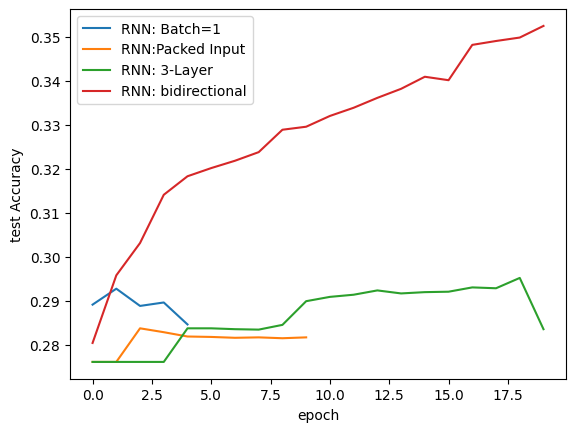

In [55]:
sns.lineplot(x='epoch', y='test Accuracy', data=batch_one_train,label='RNN: Batch=1')
sns.lineplot(x='epoch', y='test Accuracy', data=packed_train,label='RNN:Packed Input')
sns.lineplot(x='epoch', y='test Accuracy', data=rnn_3layer_results, label='RNN: 3-Layer')
sns.lineplot(x='epoch', y='test Accuracy', data=rnn_3layer_bidir_results, label='RNN: bidirectional')
print("This graph shows the test accuracy for each epoch for 4 different rnns with he same optimizer SGD")
print("Since RNN bidirectional gives us the best training accuracy, I decided to go with bidirectional.")
print("It also seemed like the model could be even more accurate based on the graph if given more epochs")



In [46]:
#This function loads the checkpoint file for the bidirectional RNN and helps me save time as I don't have to run everything again


def load_checkpoint(checkpoint_file, model, optimizer):
    """Load model and optimizer state from checkpoint."""
    checkpoint = torch.load(checkpoint_file)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    results = checkpoint['results']

    return epoch, results


In [48]:
#To run the model again at 20 epoch.
# added a additional 10 epoch to see how much the model will improve

checkpoint_file = 'checkpoints/checkpoint_20_epoch.pth'

# Initialize model and optimizer
model = rnn_3layer_bidir
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# If a checkpoint file exists, load the state from it
if checkpoint_file is not None:
    start_epoch, loaded_results = load_checkpoint(checkpoint_file, model, optimizer)
    print(f"Resuming training from epoch {start_epoch}")
else:
    start_epoch = 0
    loaded_results = {}

# Continue training from the loaded epoch
rnn_3layer_bidir_results = train_simple_network(
    model,
    loss_func,
    train_loader,
    test_loader=test_loader,
    score_funcs={'Accuracy': accuracy_score},
    device=device,
    epochs=10,
    lr=0.01,
    checkpoint_file=checkpoint_file
)


Resuming training from epoch 20


<ipython-input-46-80cb785fa7a6>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_file)


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

Training:   0%|          | 0/2555 [00:00<?, ?it/s]

Testing:   0%|          | 0/639 [00:00<?, ?it/s]

<Axes: xlabel='epoch', ylabel='test Accuracy'>

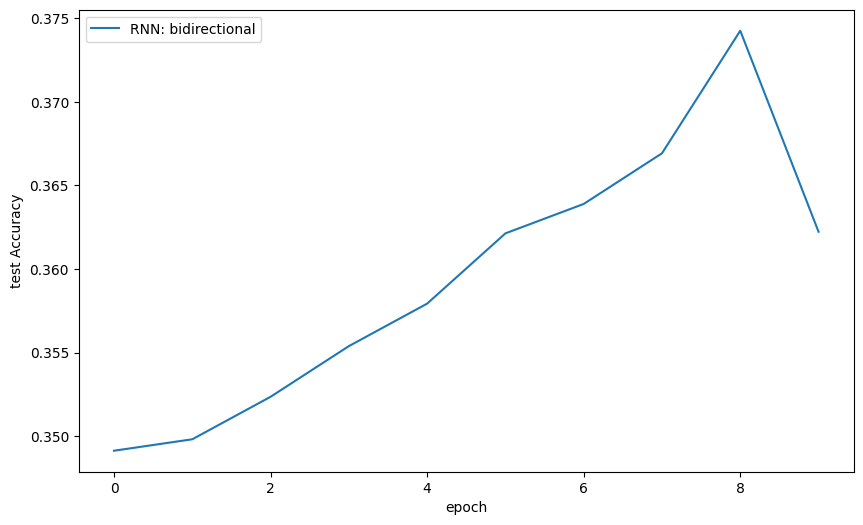

In [51]:
# Assuming 'rnn_3layer_bidir_results_20' contains the results from the first 20 epochs
# Combine the results
rnn_3layer_bidir_results['Model'] = 'RNN: bidirectional (30 epochs)'

# Now, you can plot both models on the same graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='epoch', y='test Accuracy', data=rnn_3layer_bidir_results, label='RNN: bidirectional')


